# Network problem

1 - Create data - random generation

2 - P-medium problem

3 - P-centre problem

4 - Maximum coverage

In [1]:
# import das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from docplex.mp.model import Model

In [2]:
# Dados
n = 20
np.random.seed(1)
X = list(np.random.random(n)*100)
Y = list(np.random.random(n)*100)
demanda = list(np.random.randint(low=10,high=50,size=n))

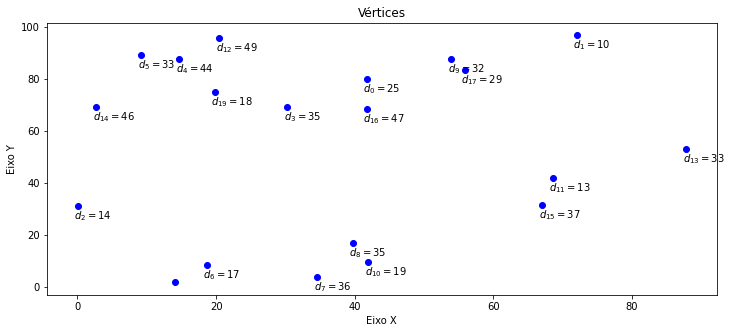

In [3]:
# Gráfico inicial

plt.figure(figsize=(12,5))
plt.scatter(X,Y,color='blue')

for i in range(len(X)):
    plt.annotate('$d_{%d} = %d$' %(i,demanda[i]),(X[i]-0.5,Y[i]-5))
    
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.title("Vértices")
plt.show()

# P-median problem

- Conjuntos e parâmetros

$V = \{1, \ldots, n \}$: representa os clientes.

$L = \{1, \ldots, m \}$: representa as localizações candidatas.

$A = \{ (i,j) \ : \ (i,j) \in N \times M \}$: conjunto de todos os arcos entre cliente e localização.

$p$: número de instalações a serem utilizadas.

- Variáveis de decisão

$x_{ij} = 1$, quando o vértice $i \in V$ é atendido pela localização $j \in L$.

$y_{j} = 1$, se a instalação está localidade no vértice $j \in L$.

- Modelo

$
\begin{align*}
\min \ & \sum_{i \in V} \sum_{j \in L} c_{ij} x_{ij} \\
& \sum_{i \in V} x_{ij} = 1 \ \forall \ j \in L \\
& \sum_{j \in L} y_j = p \\
& x_{ij} - y_{j} \leq 0 \ \forall j \in L \ \forall i \in V \\
& x \in \mathbb{B}^{|V| \times |L|} \\
& y \in \mathbb{B}^{|L|}
\end{align*}
$

In [4]:
# Conjuntos
V = [i for i in range(n)] # vértices
L = {i for i in V} # localizações
A = {(i,j) for i in V for j in L} # arcos

In [5]:
# número máximo de localizações
p = 5

In [6]:
# Matriz de distâncias
D = {(i,j) :  np.hypot(X[i]-X[j],Y[i]-Y[j]) for i in V for j in L}

In [7]:
# Modelo
pmedian = Model("Pmedian")

In [8]:
# Variáveis de decisão
x = pmedian.binary_var_dict(A,name='x')
y = pmedian.binary_var_dict(L,name='y')

In [9]:
# Função objetivo
pmedian.minimize(pmedian.sum(D[i,j]*x[i,j] for j in L for i in V))

In [10]:
# Restrições
pmedian.add_constraints(pmedian.sum(x[i,j] for j in L)==1 for i in V)
pmedian.add_constraint(pmedian.sum(y[j] for j in L)==p)
pmedian.add_constraints(x[i,j] -y[j] <= 0 for i in V for j in L)

[docplex.mp.LinearConstraint[](x_0_0-y_0,LE,0),
 docplex.mp.LinearConstraint[](x_0_1-y_1,LE,0),
 docplex.mp.LinearConstraint[](x_0_2-y_2,LE,0),
 docplex.mp.LinearConstraint[](x_0_3-y_3,LE,0),
 docplex.mp.LinearConstraint[](x_0_4-y_4,LE,0),
 docplex.mp.LinearConstraint[](x_0_5-y_5,LE,0),
 docplex.mp.LinearConstraint[](x_0_6-y_6,LE,0),
 docplex.mp.LinearConstraint[](x_0_7-y_7,LE,0),
 docplex.mp.LinearConstraint[](x_0_8-y_8,LE,0),
 docplex.mp.LinearConstraint[](x_0_9-y_9,LE,0),
 docplex.mp.LinearConstraint[](x_0_10-y_10,LE,0),
 docplex.mp.LinearConstraint[](x_0_11-y_11,LE,0),
 docplex.mp.LinearConstraint[](x_0_12-y_12,LE,0),
 docplex.mp.LinearConstraint[](x_0_13-y_13,LE,0),
 docplex.mp.LinearConstraint[](x_0_14-y_14,LE,0),
 docplex.mp.LinearConstraint[](x_0_15-y_15,LE,0),
 docplex.mp.LinearConstraint[](x_0_16-y_16,LE,0),
 docplex.mp.LinearConstraint[](x_0_17-y_17,LE,0),
 docplex.mp.LinearConstraint[](x_0_18-y_18,LE,0),
 docplex.mp.LinearConstraint[](x_0_19-y_19,LE,0),
 docplex.mp.LinearCo

In [11]:
# Resolve o problema
solucao = pmedian.solve(log_output=True)

CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
Reduced MIP has 421 rows, 420 columns, and 1220 nonzeros.
Reduced MIP has 420 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (1.16 ticks)
Found incumbent of value 1035.687410 after 0.01 sec. (2.88 ticks)
Probing time = 0.00 sec. (0.45 ticks)
Tried aggregator 1 time.
Reduced MIP has 421 rows, 420 columns, and 1220 nonzeros.
Reduced MIP has 420 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (1.33 ticks)
Probing time = 0.00 sec. (0.45 ticks)
Clique table members: 420.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.00 sec. (0.98 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                         1035.6874        0.0000     

In [12]:
# Status da solução
status = pmedian.get_solve_status()
print(status)

JobSolveStatus.OPTIMAL_SOLUTION


In [13]:
# Print solução
solucao.display()

solution for: Pmedian
objective: 223.708
x_19_4 = 1
x_0_17 = 1
x_17_17 = 1
x_3_4 = 1
x_9_17 = 1
x_13_11 = 1
x_5_4 = 1
x_18_6 = 1
x_10_10 = 1
x_12_4 = 1
x_16_17 = 1
x_4_4 = 1
x_15_11 = 1
x_2_6 = 1
x_6_6 = 1
x_11_11 = 1
x_14_4 = 1
x_1_17 = 1
x_8_10 = 1
x_7_10 = 1
y_4 = 1
y_6 = 1
y_10 = 1
y_11 = 1
y_17 = 1


In [14]:
# Obter as variáveis x ativos
arcos_ativos = [k for k in A if x[k].solution_value > 0.99]
print(arcos_ativos)

[(19, 4), (0, 17), (17, 17), (3, 4), (9, 17), (13, 11), (5, 4), (18, 6), (10, 10), (12, 4), (16, 17), (4, 4), (15, 11), (2, 6), (6, 6), (11, 11), (14, 4), (1, 17), (8, 10), (7, 10)]


In [15]:
# Obter as variáveis y ativas
localizacao_ativas = [k for k in L if y[k].solution_value > 0.99]
print(localizacao_ativas)

[4, 6, 10, 11, 17]


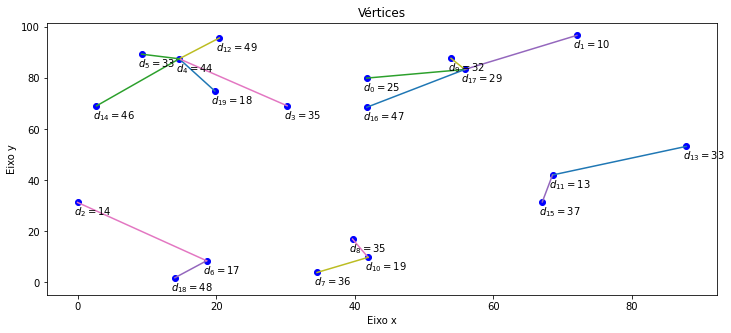

In [16]:
# Gráfico das solução

plt.figure(figsize=(12,5))
plt.scatter(X,Y,color='blue')

for i in range(len(X)):
    plt.annotate('$d_{%d} = %d$' %(i,demanda[i]),(X[i]-0.5,Y[i]-5))

for e in arcos_ativos:
    i = e[0]
    j = e[1]
    plt.plot([X[i],X[j]],[Y[i],Y[j]],localizacao_ativas.index(j))
    
plt.xlabel("Eixo x")
plt.ylabel("Eixo y")
plt.title("Vértices")
plt.show()

# P-center problem

In [17]:
# Conjuntos
V = [i for i in range(n)] # vértices
L = {i for i in V} # localizações
A = {(i,j) for i in V for j in L} # arcos

In [18]:
# Número máximo de localizações
p = 5

In [19]:
# Matriz de distâncias
D = {(i,j) :  np.hypot(X[i]-X[j],Y[i]-Y[j]) for i in V for j in L}

In [20]:
# Dicionário de peso relativo das demandas
demanda_total = sum(demanda)
w = {i: demanda[i]/demanda_total for i in V}
print(w)

{0: 0.04032258064516129, 1: 0.016129032258064516, 2: 0.02258064516129032, 3: 0.056451612903225805, 4: 0.07096774193548387, 5: 0.0532258064516129, 6: 0.027419354838709678, 7: 0.05806451612903226, 8: 0.056451612903225805, 9: 0.05161290322580645, 10: 0.03064516129032258, 11: 0.020967741935483872, 12: 0.07903225806451612, 13: 0.0532258064516129, 14: 0.07419354838709677, 15: 0.05967741935483871, 16: 0.07580645161290323, 17: 0.0467741935483871, 18: 0.07741935483870968, 19: 0.02903225806451613}


In [21]:
# Modelo
pcenter = Model("PCenter")

In [22]:
# Variáveis
x = pcenter.binary_var_dict(A,name='x')
y = pcenter.binary_var_dict(L,name='y')
z = pcenter.continuous_var(name='z')

In [23]:
# Função objetivo
pcenter.minimize(z)

In [26]:
# Restrições
pcenter.add_constraints(pcenter.sum(D[i,j]*x[i,j]*w[i] for i in V)<=z for j in L)
pcenter.add_constraints(pcenter.sum(x[i,j] for j in L)==1 for i in V)
pcenter.add_constraint(pcenter.sum(y[j] for j in L) <= p)
M = len(L)
pcenter.add_constraints(pcenter.sum(x[i,j] for i in V) - M*y[j] <= 0 for j in L)

[docplex.mp.LinearConstraint[](x_9_0+x_16_0+x_1_0+x_8_0+x_0_0+x_15_0+x_7_0+x_14_0+x_6_0+x_13_0+x_5_0+x_12_0+x_19_0+x_4_0+x_11_0+x_18_0+x_3_0+x_10_0+x_17_0+x_2_0-20y_0,LE,0),
 docplex.mp.LinearConstraint[](x_14_1+x_5_1+x_6_1+x_19_1+x_11_1+x_12_1+x_3_1+x_4_1+x_17_1+x_18_1+x_9_1+x_10_1+x_1_1+x_2_1+x_16_1+x_8_1+x_15_1+x_0_1+x_7_1+x_13_1-20y_1,LE,0),
 docplex.mp.LinearConstraint[](x_3_2+x_16_2+x_8_2+x_14_2+x_0_2+x_6_2+x_13_2+x_15_2+x_5_2+x_7_2+x_18_2+x_10_2+x_17_2+x_12_2+x_2_2+x_19_2+x_9_2+x_4_2+x_11_2+x_1_2-20y_2,LE,0),
 docplex.mp.LinearConstraint[](x_7_3+x_17_3+x_18_3+x_19_3+x_9_3+x_10_3+x_11_3+x_1_3+x_12_3+x_2_3+x_3_3+x_4_3+x_16_3+x_13_3+x_8_3+x_14_3+x_15_3+x_5_3+x_0_3+x_6_3-20y_3,LE,0),
 docplex.mp.LinearConstraint[](x_19_4+x_15_4+x_11_4+x_7_4+x_3_4+x_17_4+x_13_4+x_9_4+x_5_4+x_16_4+x_12_4+x_1_4+x_8_4+x_4_4+x_18_4+x_0_4+x_10_4+x_2_4+x_14_4+x_6_4-20y_4,LE,0),
 docplex.mp.LinearConstraint[](x_8_5+x_4_5+x_18_5+x_0_5+x_10_5+x_2_5+x_14_5+x_6_5+x_19_5+x_15_5+x_11_5+x_7_5+x_3_5+x_17_5+x_13_5+x

In [27]:
# Resolve o problema
solucao = pcenter.solve(log_output=True)

CPXPARAM_Read_DataCheck                          1
16 of 16 MIP starts provided solutions.
MIP start 'm1' defined initial solution with objective 2.7789.
Tried aggregator 1 time.
MIP Presolve eliminated 61 rows and 0 columns.
Reduced MIP has 61 rows, 421 columns, and 1240 nonzeros.
Reduced MIP has 420 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (1.24 ticks)
Probing time = 0.00 sec. (0.99 ticks)
Tried aggregator 1 time.
Reduced MIP has 61 rows, 421 columns, and 1240 nonzeros.
Reduced MIP has 420 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.99 ticks)
Probing time = 0.00 sec. (0.99 ticks)
Clique table members: 420.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.00 sec. (0.58 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound   

In [28]:
# Status da solução
status = pcenter.get_solve_status()
print(status)

JobSolveStatus.OPTIMAL_SOLUTION


In [29]:
# Obter ariáveis x ativas
arcos_ativos = [e for e in A if x[e].solution_value > 0.99]
print(arcos_ativos)

[(19, 4), (10, 7), (6, 14), (8, 7), (14, 14), (13, 11), (5, 4), (12, 4), (4, 4), (15, 11), (0, 4), (3, 16), (7, 7), (17, 16), (11, 11), (1, 11), (9, 16), (16, 16), (2, 14), (18, 7)]


In [30]:
# Obter ariáveis x ativas
localizacoes_ativas = [k for k in L if y[k].solution_value > 0.99]
print(localizacoes_ativas)

[4, 7, 11, 14, 16]


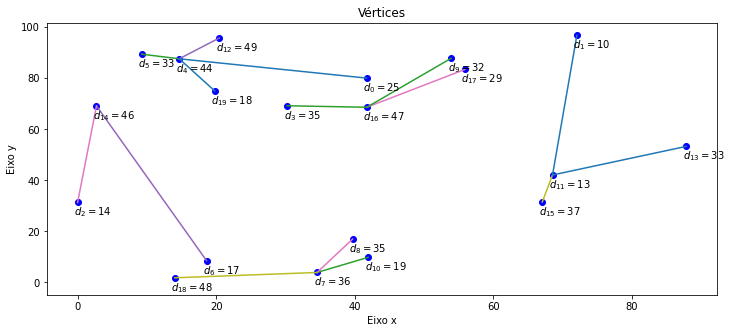

In [31]:
# Gráfico das soluções
plt.figure(figsize=(12,5))
plt.scatter(X,Y,color='blue')

for i in range(len(X)):
    plt.annotate('$d_{%d} = %d$' %(i,demanda[i]),(X[i]-0.5,Y[i]-5))

for e in arcos_ativos:
    i = e[0]
    j = e[1]
    plt.plot([X[i],X[j]],[Y[i],Y[j]],localizacoes_ativas.index(j))
    
plt.xlabel("Eixo x")
plt.ylabel("Eixo y")
plt.title("Vértices")
plt.show()

# Maximum covering problem

- Conjuntos e parâmetros

$V = \{1, \ldots, n \}$: conjunto de vértices que representam um cliente.

$L = \{1, \ldots, m \}$: conjunto de vértices candidatos a localizações.

$A = \{ (i,j) \ : \ (i,j) \in V \times L \}$: conjunto dos arcos entre cada cliente e localização.

$p$: número máximo de instalações a se utilizar.

$a_{ij}$: 1 se o cliente $i \in V$ é atendido pela instalação $j \in L$, 0 caso contrário.

- variáveis

$x_i$: 1 quando o vértice $i \in I$ é abastecido.

$y_{j}$: 1 se a instalação $j$ está localizada no vértice $j \in J$.


- modelo

$
\begin{align*}
\max \ & \sum_{i \in V} d_{i} x_{i} \\
& \sum_{i \in V} a_{ij} y_i \geq x_{i} \ \forall j \in L \\
& \sum_{j \in L} y_{j} \leq p \\
& x \in \mathbb{B}^{|V|} \\
& y \in \mathbb{B}^{|V|} \\
\end{align*}
$

In [32]:
# cconjuntos
V = [i for i in range(n)]
L = {j for j in V}

In [33]:
# número máximo de localizações
p = 5

In [34]:
# distância máxima
max_cov = 10

In [35]:
# matriz de distâncias
D = {(i,j) : np.hypot(X[i]-X[j],Y[i]-Y[j]) for i in V for j in L}

In [36]:
# vértice i pode se coberto a partir da localização j
a = {(i,j) : 1 if D[i,j] <= max_cov else 0 for i in V for j in L}

In [37]:
# criando modelo
maxcovp = Model("MaxCov")

In [38]:
# criando variáveis
x = maxcovp.binary_var_dict(V,name='x')
y = maxcovp.binary_var_dict(L,name='y')

In [39]:
# função objetivo
maxcovp.maximize(maxcovp.sum(demanda[i]*x[i] for i in V))

In [40]:
# restrições
maxcovp.add_constraints(maxcovp.sum(a[i,j]*y[j] for j in L) >= x[i] for i in V)
maxcovp.add_constraint(maxcovp.sum(y[j] for j in L) <= p)

docplex.mp.LinearConstraint[](y_0+y_1+y_2+y_3+y_4+y_5+y_6+y_7+y_8+y_9+y_10+y_11+y_12+y_13+y_14+y_15+y_16+y_17+y_18+y_19,LE,5)

In [41]:
# resolve o problema
solucao = maxcovp.solve(log_output = True)

CPXPARAM_Read_DataCheck                          1
Found incumbent of value 0.000000 after 0.00 sec. (0.00 ticks)
Tried aggregator 2 times.
MIP Presolve eliminated 6 rows and 6 columns.
Aggregator did 14 substitutions.
Reduced MIP has 1 rows, 14 columns, and 14 nonzeros.
Reduced MIP has 14 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.06 ticks)
Probing time = 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
Reduced MIP has 1 rows, 14 columns, and 14 nonzeros.
Reduced MIP has 14 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.01 ticks)
Probing time = 0.00 sec. (0.00 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.00 sec. (0.01 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0               

In [42]:
# status da solução
status = maxcovp.get_solve_status()
print(status)

JobSolveStatus.OPTIMAL_SOLUTION


In [43]:
# porcetagem da cobertura
c = maxcovp.objective_value/sum(demanda)
print("Percetual da cobertura = ", round(c*100,2),"%")

Percetual da cobertura =  62.74 %


In [44]:
# x ativos
vertices_ativos = [k for k in V if x[k].solution_value > 0.99]
print(vertices_ativos)

[4, 5, 6, 7, 8, 9, 10, 12, 16, 17, 18]


In [45]:
# y ativos
localizacoes_ativas = [k for k in V if y[k].solution_value > 0.99]
print(localizacoes_ativas)

[4, 6, 9, 10, 16]


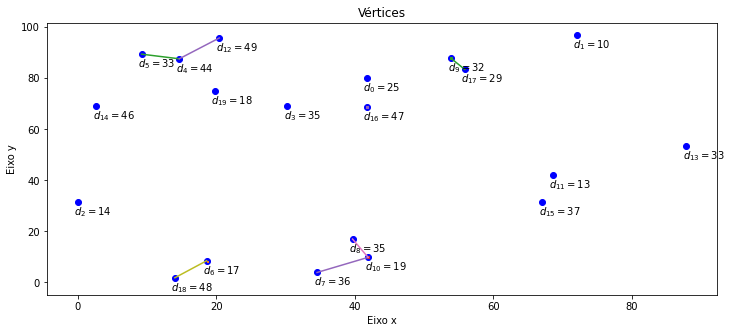

In [46]:
# gráfico da solução

plt.figure(figsize=(12,5))
plt.scatter(X,Y,color='blue')

for i in range(len(X)):
    plt.annotate('$d_{%d} = %d$' %(i,demanda[i]),(X[i]-0.5,Y[i]-5))

for q in localizacoes_ativas:
    plt.scatter(X[q],Y[q],localizacoes_ativas.index(q),marker='s')
    
    for k in range(len(V)):
        if a[(q,V[k])] == 1:
            i = V[k]
            j = q
            plt.plot([X[i],X[j]],[Y[i],Y[j]],localizacoes_ativas.index(q))
    
plt.xlabel("Eixo x")
plt.ylabel("Eixo y")
plt.title("Vértices")
plt.show()